You are provided hourly rental data spanning two years. In this dataset, the training set is comprised of the first 19 days of each month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

**Data Fields**
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

# Importing Necessary Dependencies

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [206]:
from platform import python_version

print(python_version())

3.8.8


# Importing Dataset and Exploration

In [207]:
df = pd.read_csv('bikerental.csv')

In [208]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [210]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [212]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [213]:
df['holiday'].unique()

array([0, 1], dtype=int64)

In [214]:

df['workingday'].unique()

array([0, 1], dtype=int64)

In [215]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [216]:
df['temp'].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [217]:
df['atemp'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [218]:
df['humidity'].unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91], dtype=int64)

In [219]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [220]:
df['windspeed'].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

In [221]:
df['casual'].unique()

array([  3,   8,   5,   0,   2,   1,  12,  26,  29,  47,  35,  40,  41,
        15,   9,   6,  11,   4,   7,  16,  20,  19,  10,  13,  14,  18,
        17,  21,  33,  23,  22,  28,  48,  52,  42,  24,  30,  27,  32,
        58,  62,  51,  25,  31,  59,  45,  73,  55,  68,  34,  38, 102,
        84,  39,  36,  43,  46,  60,  80,  83,  74,  37,  70,  81, 100,
        99,  54,  88,  97, 144, 149, 124,  98,  50,  72,  57,  71,  67,
        95,  90, 126, 174, 168, 170, 175, 138,  92,  56, 111,  89,  69,
       139, 166, 219, 240, 147, 148,  78,  53,  63,  79, 114,  94,  85,
       128,  93, 121, 156, 135, 103,  44,  49,  64,  91, 119, 167, 181,
       179, 161, 143,  75,  66, 109, 123, 113,  65,  86,  82, 132, 129,
       196, 142, 122, 106,  61, 107, 120, 195, 183, 206, 158, 137,  76,
       115, 150, 188, 193, 180, 127, 154, 108,  96, 110, 112, 169, 131,
       176, 134, 162, 153, 210, 118, 141, 146, 159, 178, 177, 136, 215,
       198, 248, 225, 194, 237, 242, 235, 224, 236, 222,  77,  8

In [222]:
df['registered'].unique()

array([ 13,  32,  27,  10,   1,   0,   2,   7,   6,  24,  30,  55,  47,
        71,  70,  52,  26,  31,  25,  17,  16,   8,   4,  19,  46,  54,
        73,  64,  67,  58,  43,  29,  20,   9,   5,   3,  63, 153,  81,
        33,  41,  48,  53,  66, 146, 148, 102,  49,  11,  36,  92, 177,
        98,  37,  50,  79,  68, 202, 179, 110,  34,  87, 192, 109,  74,
        65,  85, 186, 166, 127,  82,  40,  18,  95, 216, 116,  42,  57,
        78,  59, 163, 158,  51,  76, 190, 125, 178,  39,  14,  15,  56,
        60,  90,  83,  69,  28,  35,  22,  12,  77,  44,  38,  75, 184,
       174, 154,  97, 214,  45,  72, 130,  94, 139, 135, 197, 137, 141,
       156, 117, 155, 134,  89,  80, 108,  61, 124, 132, 196, 107, 114,
       172, 165, 105, 119, 183, 175,  88,  62,  86, 170, 145, 217,  91,
       195, 152,  21, 126, 115, 223, 207, 123, 236, 128, 151, 100, 198,
       157, 168,  84,  99, 173, 121, 159,  93,  23, 212, 111, 193, 103,
       113, 122, 106,  96, 249, 218, 194, 213, 191, 142, 224, 24

In [223]:
df['count'].unique()

array([ 16,  40,  32,  13,   1,   2,   3,   8,  14,  36,  56,  84,  94,
       106, 110,  93,  67,  35,  37,  34,  28,  39,  17,   9,   6,  20,
        53,  70,  75,  59,  74,  76,  65,  30,  22,  31,   5,  64, 154,
        88,  44,  51,  61,  77,  72, 157,  52,  12,   4, 179, 100,  42,
        57,  78,  97,  63,  83, 212, 182, 112,  54,  48,  11,  33, 195,
       115,  46,  79,  71,  62,  89, 190, 169, 132,  43,  19,  95, 219,
       122,  45,  86, 172, 163,  69,  23,   7, 210, 134,  73,  50,  87,
       187, 123,  15,  25,  98, 102,  55,  10,  49,  82,  92,  41,  38,
       188,  47, 178, 155,  24,  18,  27,  99, 217, 130, 136,  29, 128,
        81,  68, 139, 137, 202,  60, 162, 144, 158, 117,  90, 159, 101,
       118, 129,  26, 104,  91, 113, 105,  21,  80, 125, 133, 197, 109,
       161, 135, 116, 176, 168, 108, 103, 175, 147,  96, 220, 127, 205,
       174, 121, 230,  66, 114, 216, 243, 152, 199,  58, 166, 170, 165,
       160, 140, 211, 120, 145, 256, 126, 223,  85, 206, 124, 25

In [224]:
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['week_day'] = df['datetime'].dt.day_name()
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,week_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday


In [225]:
def map_hours(x):
    if x in range(0, 13):
        return 'morning'
    elif x in range(13, 19):
        return 'afternoon'
    elif x in range(19, 23):
        return 'evening'
    else:
        return 'night'

In [226]:
df['period'] = df['hour'].apply(map_hours)
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,week_day,period
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday,morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday,morning



# Exploratory data Analysis


<AxesSubplot:xlabel='holiday', ylabel='count'>

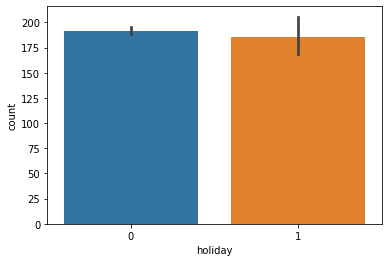

In [227]:
sns.barplot(x = df["holiday"], y = df["count"] , palette='tab10')

<AxesSubplot:xlabel='season', ylabel='count'>

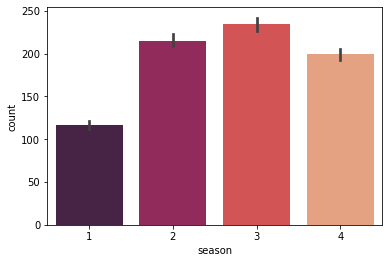

In [228]:
sns.barplot(x = df["season"], y = df["count"] , palette='rocket')

<AxesSubplot:xlabel='weather', ylabel='count'>

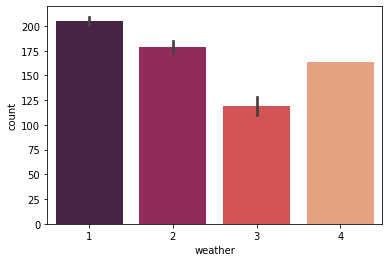

In [229]:
sns.barplot(x = df["weather"], y = df["count"] , palette='rocket')

<AxesSubplot:xlabel='period', ylabel='count'>

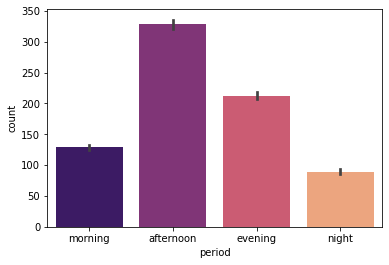

In [230]:
sns.barplot(x = df["period"], y = df["count"] , palette='magma')

<AxesSubplot:xlabel='week_day', ylabel='count'>

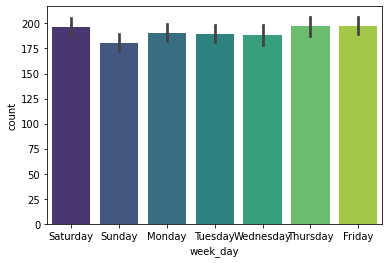

In [231]:
sns.barplot(x = df["week_day"], y = df["count"] , palette='viridis')

<AxesSubplot:xlabel='weather', ylabel='count'>

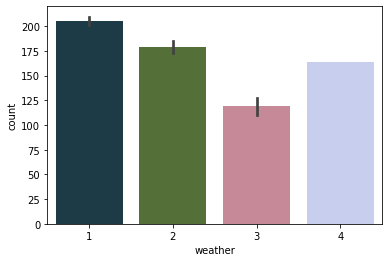

In [232]:
sns.barplot(x = df["weather"], y = df["count"] , palette='cubehelix')

# Observations:
* From Holiday vs Count plot, we observed that there was not much difference in total rentals.
* From season vs count plot, we observed that total rental was quiet less during spring in comparison to other seasons.
* From period vs count plot, we observed that total rental was higher during afternoon in comparison to other period.
* From weekday vs count plot, we observed that there was not much difference in  the total rental.
* From weather vs count plot, we observed that total rental was quiet low during light snow, light rain, Thunderstorm and Light Rain.

In [233]:
#fig, ax = plt.subplots(figsize=(10,10)) 
#sns.heatmap(df.corr(), annot=True, fmt='.02f')

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  hour        10886 non-null  int64         
 14  week_day    10886 non-null  object        
 15  period      10886 non-null  object        
dtypes: datetime64[ns](1), 

In [235]:
df_weekday = pd.get_dummies(df['week_day'], drop_first = True)

In [236]:
df_weekday

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
10881,0,0,0,0,0,1
10882,0,0,0,0,0,1
10883,0,0,0,0,0,1
10884,0,0,0,0,0,1


In [237]:
df_period = pd.get_dummies(df['period'], drop_first= True)

In [238]:
df_period

,evening,morning,night
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
10881,1,0,0
10882,1,0,0
10883,1,0,0
10884,1,0,0


In [239]:
df= pd.concat([df, df_weekday], axis =1)

In [240]:
df = df.drop('week_day', axis =1)

In [241]:
df= pd.concat([df, df_period], axis =1)

In [242]:
df = df.drop('period', axis =1)

In [243]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,evening,morning,night
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,0,0,1,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,1,0,1,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,2,0,1,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,3,0,1,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,4,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,19,0,0,0,0,0,1,1,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,20,0,0,0,0,0,1,1,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,21,0,0,0,0,0,1,1,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,22,0,0,0,0,0,1,1,0,0


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  hour        10886 non-null  int64         
 14  Monday      10886 non-null  uint8         
 15  Saturday    10886 non-null  uint8         
 16  Sunday      10886 non-

In [245]:
df['Monday'] = df['Monday'].astype(int)

In [246]:
df['Monday'] = df['Monday'].astype(int)
df['Saturday'] = df['Saturday'].astype(int)
df['Sunday'] = df['Sunday'].astype(int)
df['Thursday'] = df['Thursday'].astype(int)
df['Tuesday'] = df['Tuesday'].astype(int)
df['Wednesday'] = df['Wednesday'].astype(int)
df['evening'] = df['evening'].astype(int)
df['morning'] = df['morning'].astype(int)
df['night'] = df['night'].astype(int)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  hour        10886 non-null  int64         
 14  Monday      10886 non-null  int32         
 15  Saturday    10886 non-null  int32         
 16  Sunday      10886 non-

In [248]:
df_indep= df.drop('count', axis= 1) 


In [249]:
df_dep = df['count']

In [250]:
df_indep.shape

(10886, 22)

In [251]:
df_dep.shape

(10886,)

In [252]:
df_indep = df_indep.drop('datetime', axis=1)

In [253]:
df_indep = df_indep.drop('registered', axis=1)
df_indep = df_indep.drop('casual', axis=1)
X = df_indep
y = df_dep

In [254]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed' ,'month', 'hour']
std = StandardScaler()
std.fit(X[numeric_cols])

StandardScaler()

# Feature Selection:
* Univariate Selection

In [255]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_indep
y = df_dep
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns

In [256]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs         Score
9        hour  18120.477372
6    humidity  12286.067545
4        temp   8174.188620
5       atemp   8152.501468
7   windspeed   5282.756907
8       month   2189.557845
17    morning   1492.310603
16    evening   1222.792085
18      night    887.945385
13   Thursday    790.918976


* Feature Importance

[0.02339968 0.00310656 0.00667838 0.04481687 0.12973283 0.13184644
 0.15696561 0.16706292 0.07364455 0.17703684 0.01660911 0.00710577
 0.0068036  0.01665218 0.01451765 0.01592092 0.00333303 0.00354918
 0.00121786]


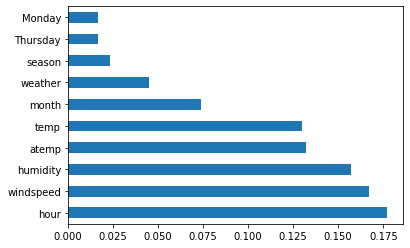

In [257]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Modeling

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [270]:
y_train.value_counts()

5      129
6       95
4       93
3       93
2       89
      ... 
854      1
858      1
862      1
894      1
943      1
Name: count, Length: 770, dtype: int64

In [271]:
y_test.value_counts()

4      56
3      51
2      43
6      40
5      40
       ..
471     1
473     1
475     1
818     1
901     1
Name: count, Length: 669, dtype: int64

>Linear Regression

In [272]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) 

Mean squared error: 17541.62
Coefficient of determination: 0.46


In [273]:
y_predreg = regr.predict(X_train)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_predreg))
#1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_predreg)) 

Mean squared error: 17250.48
Coefficient of determination: 0.48


> Ridge Regression

In [274]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 55, 100]}
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train, y_train)


C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.86693e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.89905e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44447e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.43869e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40055e-17): result may not b

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 55, 100]},
             scoring='neg_mean_squared_error')

In [275]:
ridge_reg.best_params_

{'alpha': 0.01}

In [276]:
ridge_reg.best_score_

-17332.031425799818

In [277]:
Pred_ridge = ridge_reg.predict(X_test)
ridge_score = mean_squared_error(y_test, Pred_ridge)
print("Coefficient of determination: %.2f" % r2_score(y_test, Pred_ridge)) 
ridge_score


Coefficient of determination: 0.46


17541.617935169346

In [278]:
Predt_ridge = ridge_reg.predict(X_train)
ridge_score = mean_squared_error(y_train, Predt_ridge)
print("Coefficient of determination: %.2f" % r2_score(y_train, Predt_ridge)) 
ridge_score

Coefficient of determination: 0.48


17250.48283484039

> Lasso Regression

In [279]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 55, 100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_reg.fit(X_train, y_train)
lasso_reg.best_params_
lasso_reg.best_score_
Pred_lasso = lasso_reg.predict(X_test)
lasso_score = mean_squared_error(y_test, Pred_lasso)

print("Coefficient of determination: %.2f" % r2_score(y_test, Pred_lasso))
lasso_score

C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50343855.17930687, tolerance: 19165.39727879671
  model = cd_fast.enet_coordinate_descent(
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50718473.720254734, tolerance: 19252.759568392186
  model = cd_fast.enet_coordinate_descent(
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48768179.57290423, tolerance: 19206.52940836476
  model = cd_fast.enet_coordinate_descent(
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

Coefficient of determination: 0.46


17542.16615497796

In [280]:
Predl_lasso = lasso_reg.predict(X_train)
lasso_score = mean_squared_error(y_train, Predl_lasso)

print("Coefficient of determination: %.2f" % r2_score(y_train, Predl_lasso))
lasso_score

Coefficient of determination: 0.48


17250.515172539603

> Random Forest

In [281]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [282]:
from sklearn.metrics import mean_squared_error, r2_score
score = mean_squared_error(y_test, rfr_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, rfr_pred)) 
score

Coefficient of determination: 0.85


4820.7326689900365

In [283]:
rfrt_pred = rfr.predict(X_train)
score = mean_squared_error(y_train, rfrt_pred)
print("Coefficient of determination: %.2f" % r2_score(y_train, rfrt_pred)) 
score

Coefficient of determination: 0.98


624.732707083297

> SVM

In [284]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C=1.0, epsilon=0.1)
regressor.fit(X_train, y_train)


SVR(kernel='linear')

In [285]:
y_pred = regressor.predict(X_test)

In [286]:
from sklearn.metrics import mean_squared_error, r2_score
score = mean_squared_error(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) 
score

Coefficient of determination: 0.38


20209.785315345605

> XGBoost

In [287]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [192]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [193]:
yhat  = xgb.predict(X_test)

In [194]:
from sklearn.metrics import mean_squared_error, r2_score
score = mean_squared_error(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) 
score

Coefficient of determination: 0.39


19888.770584014554

# Random Forest

In [195]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [196]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [197]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [198]:
rf_random.best_params_
rf_random.best_score_
Pred_random = rf_random.predict(X_test)
random_score = mean_squared_error(y_test, Pred_random)

print("Coefficient of determination: %.2f" % r2_score(y_test, Pred_random))
lasso_score

Coefficient of determination: 0.86


17345.612216705635

In [199]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [200]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [201]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [202]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [203]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [204]:
rf_random.best_params_
rf_random.best_score_
Pred_random = rf_random.predict(X_test)
random_score = mean_squared_error(y_test, Pred_random)

print("Coefficient of determination: %.2f" % r2_score(y_test, Pred_random))
lasso_score

Coefficient of determination: 0.86


17345.612216705635

In [276]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,week_day,period
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,Saturday,morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,Saturday,morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2,Saturday,morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,3,Saturday,morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,4,Saturday,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,Wednesday,evening
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,20,Wednesday,evening
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,21,Wednesday,evening
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,22,Wednesday,evening


In [277]:
#Handling Categorical feature Gender
df['week_day'] = df['week_day'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,week_day,period
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,6,morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,6,morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,6,morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,6,morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,6,morning


In [278]:
#Handling Categorical feature Gender
df['period'] = df['period'].map({'morning':1, 'afternoon':2, 'evening':3, 'night':4})
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,week_day,period
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,6,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,6,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,6,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,6,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,6,1


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  hour        10886 non-null  int64         
 14  week_day    10886 non-null  int64         
 15  period      10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [146]:
df_indep= df.drop('count', axis= 1) 
df_dep = df['count']

In [147]:
df_indep.shape


(10886, 15)

In [148]:
df_indep = df_indep.drop('datetime', axis=1)

In [149]:
df_indep = df_indep.drop('registered', axis=1)
df_indep = df_indep.drop('casual', axis=1)
X = df_indep
y = df_dep

In [150]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed' ,'month', 'hour']
std = StandardScaler()
std.fit(X[numeric_cols])

StandardScaler()

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

> Linear Regression

In [152]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) 

Mean squared error: 18203.85
Coefficient of determination: 0.44


> Ridge Regression

In [153]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 55, 100]}
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 55, 100]},
             scoring='neg_mean_squared_error')

In [154]:
ridge_reg.best_params_

{'alpha': 5}

In [155]:

ridge_reg.best_score_

-18493.772399997884

In [156]:

Pred_ridge = ridge_reg.predict(X_test)
ridge_score = mean_squared_error(y_test, Pred_ridge)
print("Coefficient of determination: %.2f" % r2_score(y_test, Pred_ridge)) 
ridge_score

Coefficient of determination: 0.44


18203.97521196559

> Lasso Regression

In [157]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 55, 100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_reg.fit(X_train, y_train)
lasso_reg.best_params_
lasso_reg.best_score_
Pred_lasso = lasso_reg.predict(X_test)
lasso_score = mean_squared_error(y_test, Pred_lasso)

print("Coefficient of determination: %.2f" % r2_score(y_test, Pred_lasso))
lasso_score

C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54415304.238486916, tolerance: 19285.92574316078
  model = cd_fast.enet_coordinate_descent(
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53376355.033405595, tolerance: 19292.28301947206
  model = cd_fast.enet_coordinate_descent(
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53499367.407442674, tolerance: 19271.88217649983
  model = cd_fast.enet_coordinate_descent(
C:\Users\Prakash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

Coefficient of determination: 0.44


18203.922361202294

> Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [159]:
from sklearn.metrics import mean_squared_error, r2_score
score = mean_squared_error(y_test, rfr_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, rfr_pred)) 
score

Coefficient of determination: 0.86


4490.513910941201

> SVM

In [160]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C=1.0, epsilon=0.1)
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [161]:

y_pred = regressor.predict(X_test)

In [162]:
from sklearn.metrics import mean_squared_error, r2_score
score = mean_squared_error(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) 
score

Coefficient of determination: 0.39


19838.109180170017

In [280]:
df_indep= df.drop('count', axis= 1) 

In [281]:
df_dep = df['count']

In [282]:
df_indep = df_indep.drop('datetime', axis=1)

In [283]:
df_indep = df_indep.drop('registered', axis=1)
df_indep = df_indep.drop('casual', axis=1)
X = df_indep
y = df_dep

In [284]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed' ,'month', 'hour']
std = StandardScaler()
std.fit(X[numeric_cols])

StandardScaler()

# Feature Selection
* Univariate Selection

In [285]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_indep
y = df_dep
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns

In [286]:

print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs         Score
9        hour  18120.477372
6    humidity  12286.067545
4        temp   8174.188620
5       atemp   8152.501468
7   windspeed   5282.756907
8       month   2189.557845
11     period    943.197910
10   week_day    940.826815
1     holiday    681.355480
0      season    610.371058


* Feature Importance

[0.02071387 0.0037818  0.00932683 0.04319419 0.12966096 0.13103879
 0.15856868 0.16619152 0.07100568 0.16557259 0.08899611 0.01194898]


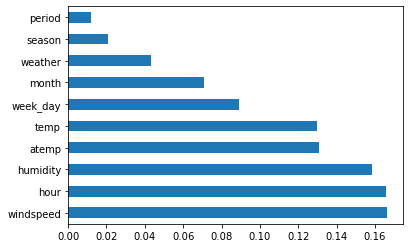

In [287]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()